# FINANCE PROJECT

**Data analysis of stock prices and see how they progressed throughout the financial crisis from 2006 to 2016**

In [ ]:
Stock information for the following banks:

Bank of America
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo



In [4]:
#importing the necessary libraries and using pandas to directly read data from Google finance
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
#Creating start and end date using datetime library
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)


In [6]:
#Creating separate DataFrames for each bank
BAC = data.DataReader("BAC", 'yahoo', start, end )
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [7]:
#Combining all DataFrames to df
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)
df.head(2)

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  35.054218  384.214600  106.906731  27.264044  37.170383   
2006-01-04  34.681938  377.121155  105.430092  27.106680  37.195881   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.324865  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.089125  46.580002  483.799988  127.089996  39.619999  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870900.0  4861600.0  13491500.0  7977800.0  10870000.0  

[2 rows x 36 columns]

In [8]:
#Creating a list which contains the ticker symbols of each banks
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [9]:
#Concatinating the DataFrames to a single DataFrame with key arguments equal to tickers list
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.head(2)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.054218   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.681938   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   

                                                WFC                     \
                Close     Volume  Adj Close    High     Low       Open   
Date                                                                     
2006-01-03  58.310001  5377000.0  37.170383  31.975  31.195  31.600000   
2006-01-04  58.349998  7977800.0  37.195881  31.820  31.365  31.799999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.818630  
2006-01-04  31.530001  10870000.0  20.577162  

[2 rows x 36 columns]

In [10]:
#Setting up of column names
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head(2)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   

Bank Ticker         MS                                      WFC          \
Stock Info        Open      Close     Volume  Adj Close    High     Low   
Date                                                                      
2006-01-03   57.169998  58.310001  5377000.0  37.170383  31.975  31.195   
2006-01-04   58.700001  58.349998  7977800.0  37.195881  31.820  31.365   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.818630  
2006-01-04   31.799999  31.530001  10870000.0  20.577162  

[2 rows x 36 columns]

In [11]:
# max Close price for each bank's stock throughout the time period
bank_stocks.xs('Close',level='Stock Info',axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [12]:
#Creating an empty DataFrame and assigning the returns of each banks as separate columns in the new DataFrame
returns=pd.DataFrame()
for i in tickers:
    returns[i+'Return']=bank_stocks[i]['Close'].pct_change()
returns.head()


,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


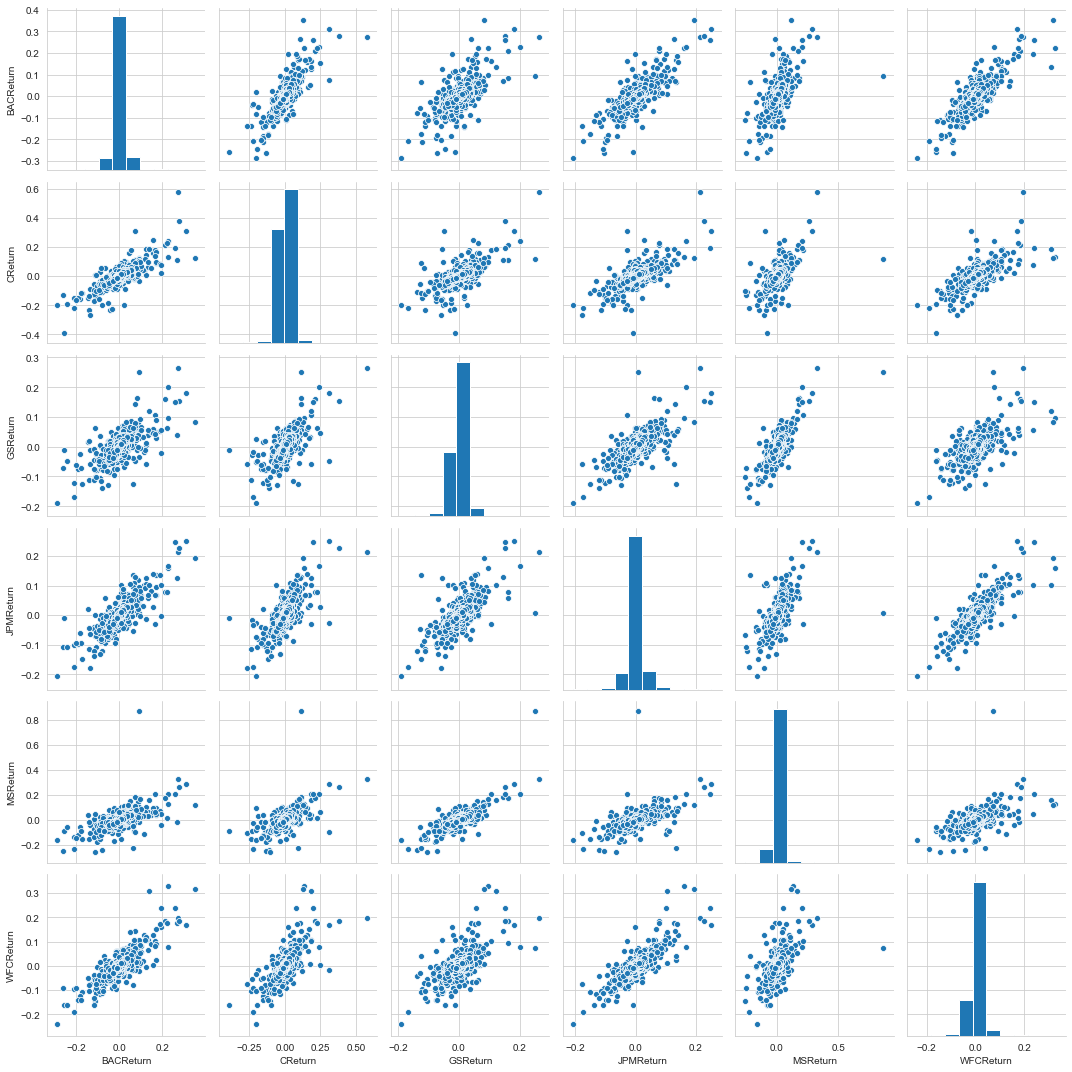

In [13]:
#Create a pairplot of returns DataFrame
sns.pairplot(returns[1:])
plt.tight_layout()

In [14]:
#Dates for which the banks had the best and worst single day returns
print(returns.idxmin())
returns.idxmax()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]


BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [18]:
#Standard deviation of returns of each bank in 2015 to find the riskiest stock of year 2015
returns.loc['2015-01-01':'2015-12-31'].std() 

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

In [19]:
#Standard deviation of returns of each bank to find the riskiest stock
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

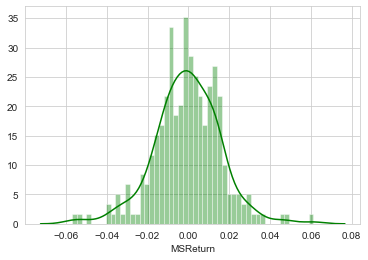

In [20]:
#distplot using seaborn of the 2015 returns for Morgan Stanley 
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=50)

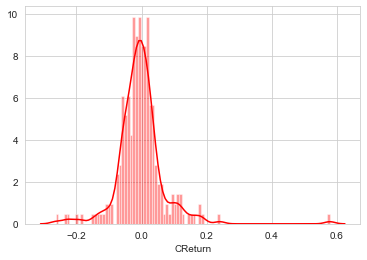

In [21]:
#distplot using seaborn of the 2008 returns for CitiGroup
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=100)

In [32]:
#Data visualization using plotly
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [33]:
#line plot showing Close price for each bank for the entire index of time
bank_stocks.xs('Close',level='Stock Info',axis=1).iplot()

In [34]:
# create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016
bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].iplot(kind='candle')

In [35]:
# create a Bollinger Band Plot for Bank of America for the year 2015
bank_stocks.loc['2015-01-01':'2015-12-01']['BAC']['Close'].ta_plot(study='boll')

In [36]:
#create a Simple Moving Averages plot of Morgan Stanley for the year 2015
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

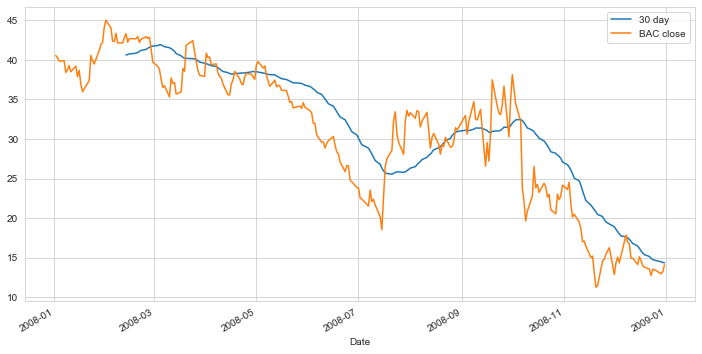

In [37]:
#analyze the moving averages for these stocks in the year 2008.
#Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
bank_stocks.loc['2008-01-01':'2008-12-31']['BAC']['Close'].rolling(window=30).mean().plot(figsize=(12,6),label='30 day')
bank_stocks.loc['2008-01-01':'2008-12-31']['BAC']['Close'].plot(figsize=(12,6),label='BAC close')
plt.legend()

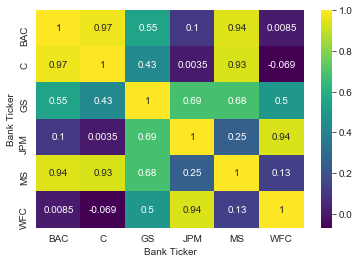

In [38]:
# heatmap of the correlation between the stocks Close Price.
s=bank_stocks.xs('Close',level='Stock Info',axis=1)
sns.heatmap(s.corr(),annot=True,cmap='viridis')

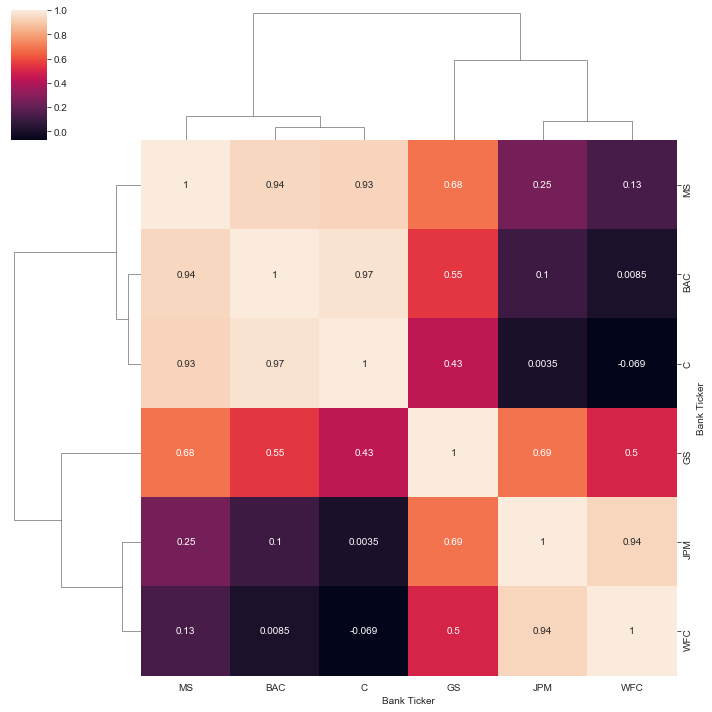

In [39]:
#clustermap to cluster the correlations together
sns.clustermap(s.corr(),annot=True)

# THE END